In [2]:
import torch
import numpy as np
from torch2jax import j2t,t2j
import jax
import sys,os
from brax.io.torch import jax_to_torch 
import time
import copy

os.environ['CUDA_VISIBLE_DEVICES'] ='1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.25'

import jax.numpy as jnx

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

#jax.config.update("jax_default_device", jax.devices()[2])

from ensemble.ensemble import EnsembleModels

from Trajectory.walker_mpc import Walker_MPC


In [3]:
f_size = (8.0,6.0)
l_wid = 4
t_size = 24
lable_size = 28


In [4]:
from matplotlib import pyplot as plt

In [6]:
#cartpole
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_err = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_BPref/err/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_err.append(results)
std_err = np.std(results_err,axis=0)
results_err  = np.mean(results_err ,axis=0)

results_stoc = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_BPref/stoc/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_stoc.append(results)
std_stoc = np.std(results_stoc,axis=0)
results_stoc  = np.mean(results_stoc ,axis=0)

results_myop = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_BPref/myopic/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_myop.append(results)
std_myop = np.std(results_myop,axis=0)
results_myop  = np.mean(results_myop ,axis=0)

print('ours', results_ours[-1],std_ours[-1])
print('err', results_err[-1],std_err[-1])
print('stoc', results_stoc[-1],std_stoc[-1])
print('myop', results_myop[-1],std_myop[-1])

ours 130.6829 2.0580544
err 122.625656 14.606623
stoc 93.57124 30.623716
myop 126.97727 26.540543


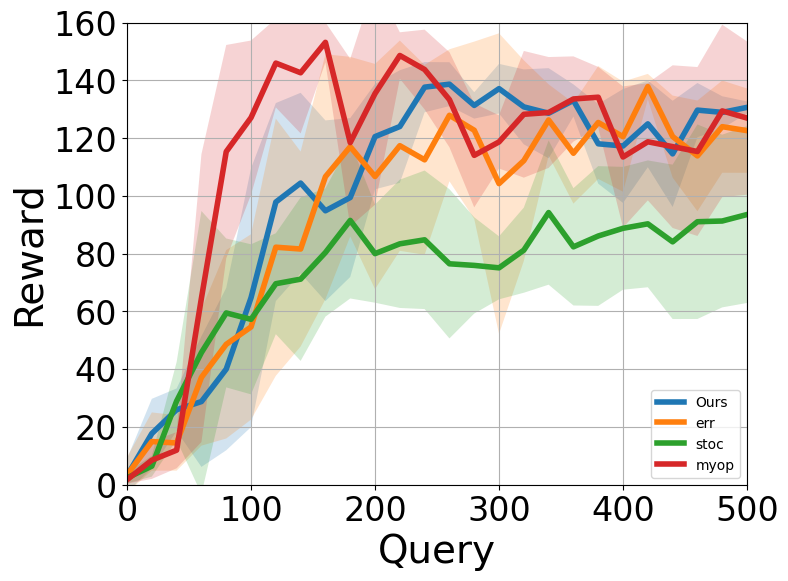

In [9]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,52,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_err,label='err',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_err-std_err,results_err+std_err,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_stoc,label='stoc',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_stoc-std_stoc,results_stoc+std_stoc,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_myop,label='myop',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_myop-std_myop,results_myop+std_myop,alpha=0.2)

plt.legend()
plt.ylim(0,160)
plt.xlim(0,500)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)



plt.savefig('../Data/Figs/err_3/cartpole_bpref.jpg',bbox_inches="tight")

In [55]:
results_ours =[]
for j in (1,2,3,4,5):
    res = np.load('../Data/Human_fb/Walker_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,21,1):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (2,3,4,5):
    res = np.load('../Data/Human_fb/Walker_BT_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,21,1):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

Text(0, 0.5, 'Reward')

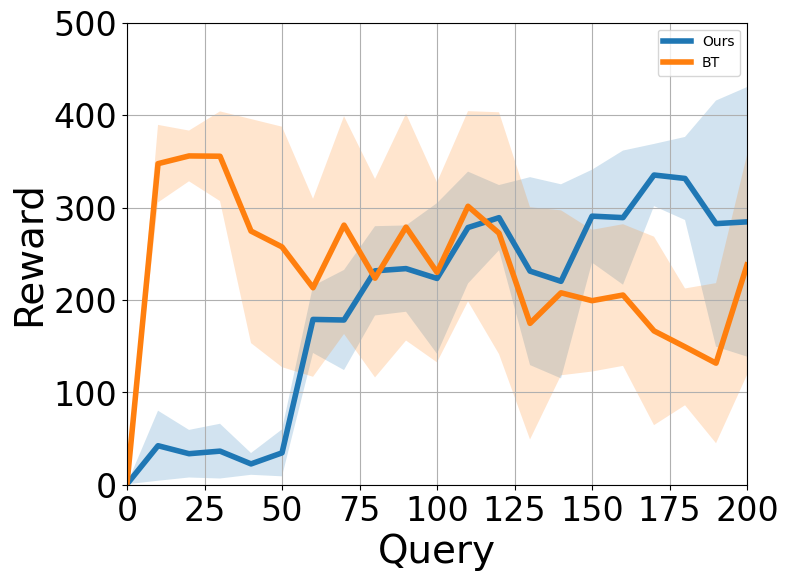

In [56]:
plt.figure(figsize=f_size)
plt.grid()
plt.plot(np.arange(0,21,1)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,21,1)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,21,1)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,21,1)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.legend()
plt.ylim(0,500)
plt.xlim(0,200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)